## Grammar Experiments

In [3]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_ontologies(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract named entities
    ontologies = [(ent.text, ent.label_) for ent in doc.ents]

    return ontologies

# Example usage
text = "Barack Obama was the 44th President of the United States. He was born in Hawaii."
ontologies = extract_ontologies(text)
print(ontologies)

[('Barack Obama', 'PERSON'), ('44th', 'ORDINAL'), ('the United States', 'GPE'), ('Hawaii', 'GPE')]


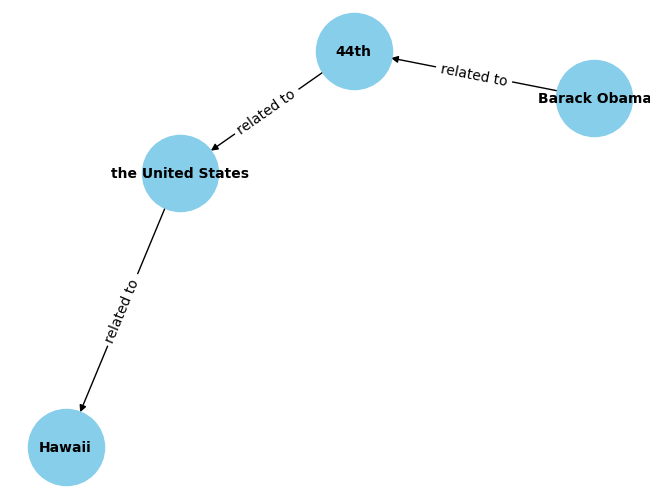

In [4]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on the extracted ontologies
for entity, label in ontologies:
    G.add_node(entity, label=label)

# Automatically add edges based on the ontologies
for i in range(len(ontologies) - 1):
    G.add_edge(ontologies[i][0], ontologies[i + 1][0], relation='related to')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

/* EBNF grammar for parsing references with all necessary definitions */

<References> ::= <Reference> ( <NEWLINE> <Reference> )*

<Reference> ::= "[" <ReferenceNumber> "]" <AuthorList> <Title> <SourceInfo> <Date> <Pages> <Publisher> <ISBN> <DOI>

<ReferenceNumber> ::= [0-9]+

<AuthorList> ::= <Author> ( "," <Author> )* ( "and" <Author> )?

<Author> ::= <Name> ( <Name> )*

<Name> ::= <WORD> | <Abbreviation>

<Abbreviation> ::= [A-Z] "."

<Title> ::= <Text>

<SourceInfo> ::= ( <JournalInfo> | <ConferenceInfo> )

<JournalInfo> ::= <JournalName> "," <Volume> "(" <Issue> ")" ":" <Pages> "," <Month> <Year>

<ConferenceInfo> ::= "In" <Text> "," <Pages> "," <Location> "," <Year> "," <Publisher>

<Date> ::= <Month> <Year>

<Pages> ::= [0-9]+ ( "-" [0-9]+ )?

<Publisher> ::= <Text>

<ISBN> ::= "ISBN" <WORD>

<DOI> ::= "doi:" <WORD>

<JournalName> ::= <WORD> ( <WORD> )*

<Volume> ::= [0-9]+

<Issue> ::= [0-9]+

<Location> ::= <Text>

<Month> ::= "January" | "February" | "March" | "April" | "May" | "June" | "July" | "August" | "September" | "October" | "November" | "December"

<Year> ::= [0-9]+

<Text> ::= <WORD> ( <WORD> | <PUNCT> )*

<NEWLINE> ::= "\n"

<WORD> ::= [a-z] | [A-Z] | [0-9] ( [a-z] | [A-Z] | [0-9] )*

<PUNCT> ::= "." | "," | ":" | "-" | "(" | ")" | "'"


## OWL RDF/XML Experiments

In [44]:
rdfxml_prompt = '''You are an ontology extraction system that processes unstructured text and outputs entities, relationships, and predicates following OWL 2 Web Ontology Language specifications. You will receive unstructured text as input and must output ontology documents in RDF/XML syntax.
Use the IRI for the base ontology: https://extensity.ai/ontology#
Reuse the PROV-O ontology classes and properties for creating the hierarchy of the ontology.
Incorporate data properties, Inverse Properties, and ensure the hierarchy is well-structured.

Pre-processing Rules:
1. Identify main concepts and their hierarchies
2. Determine property types (object vs datatype)
3. Extract cardinality and other restrictions
4. Identify equivalent concepts and properties
5. Extract instance data and relationships

Rules and Requirements:
1. Extract only factual information present in the text
2. Follow OWL 2 naming conventions for IRIs
3. Create hierarchical class relationships where appropriate
4. Distinguish between object properties and data properties
5. Include cardinality constraints when evident
6. Identify equivalent classes and properties
7. Add rdfs:label annotations in English
8. Use consistent naming patterns for all elements
9. Output valid RDF/XML only, no explanations or conversation

Output Structure:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="https://extensity.ai/ontology#"
         xml:base="http://extensity.ai/ontology"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">

    <owl:Ontology rdf:about="">
        <owl:versionIRI rdf:resource="http://extensity.ai/ontology/1.0"/>
        <owl:imports rdf:resource="http://extensity.ai/required-ontology"/>
        <rdfs:comment>Generated from unstructured text</rdfs:comment>
        <owl:versionInfo>Version 1.0</owl:versionInfo>
    </owl:Ontology>

    <!-- Classes -->
    <owl:Class rdf:about="#Class1">
        <rdfs:label xml:lang="en">Class1 Label</rdfs:label>
        <rdfs:subClassOf rdf:resource="#ParentClass"/>
        <owl:equivalentClass rdf:resource="#EquivalentClass"/>
        <owl:disjointWith rdf:resource="#DisjointClass"/>
    </owl:Class>

    <!-- Object Properties -->
    <owl:ObjectProperty rdf:about="#objectProperty1">
        <rdfs:label xml:lang="en">Object Property 1</rdfs:label>
        <rdfs:domain rdf:resource="#Domain"/>
        <rdfs:range rdf:resource="#Range"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#TransitiveProperty"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#SymmetricProperty"/>
        <owl:inverseOf rdf:resource="#inverseProperty"/>
        <rdfs:subPropertyOf rdf:resource="#parentProperty"/>
        <owl:propertyChainAxiom rdf:parseType="Collection">
            <rdf:Description rdf:about="#propertyA"/>
            <rdf:Description rdf:about="#propertyB"/>
        </owl:propertyChainAxiom>
    </owl:ObjectProperty>

    <!-- Data Properties -->
    <owl:DatatypeProperty rdf:about="#dataProperty1">
        <rdfs:domain rdf:resource="#Domain"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#string"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>
    </owl:DatatypeProperty>

    <!-- Individuals -->
    <owl:NamedIndividual rdf:about="#individual1">
        <rdf:type rdf:resource="#Class1"/>
        <objectProperty1 rdf:resource="#otherIndividual"/>
        <dataProperty1>value</dataProperty1>
    </owl:NamedIndividual>
</rdf:RDF>
```

Here is an example list how it is expected to extract classes and properties for an ontology:

Concepts: RawDataCollectionMethod, DataFormat, DataAnnotationTechnique, DataAugmentationTechnique, Dataset, PreprocessingStep, DataSplittingCriteria, CodeRepository, DataRepository, ModelType, Hyperparameter, HyperparameterOptimizationTechnique, OptimizationTechnique, TrainingCompletionCriteria, RegularizationMethod, ModelPerformanceMonitoringStrategy, DeepLearningFramework, HardwareResource, PostprocessingStep, EvaluationMetric, GeneralizabilityMeasure, RandomnessHandlingStrategy, ModelPurpose, DataBiasHandlingTechnique, ModelDeploymentProcess, DeploymentPlatform
Relationships: utilizesRawDataCollectionMethod, hasDataFormat, hasDataAnnotationTechnique, hasDataAugmentationTechnique, hasDataset, involvesPreprocessingStep, usesDataSplittingCriteria, hasCodeRepository, hasDataRepository, usesModelType, hasHyperparameter, optimizesHyperparameter, appliesOptimizationTechnique, determinesTrainingCompletion, usesRegularizationMethod, implementsModelPerformanceMonitoring, usesDeepLearningFramework, usesHardwareResource, involvesPostprocessingStep, evaluatesWithMetric, ensuresGeneralizabilityWithMeasure, employsRandomnessHandlingStrategy, servesModelPurpose, addressesDataBiasWithTechnique, followsModelDeploymentProcess, deploysOnPlatform
DataProperties: repositoryLink
InverseProperties: isUtilizedByRawDataCollectionMethod, isDataFormatOf, isDataAnnotationTechniqueOf, isDataAugmentationTechniqueOf, isDatasetOf, isPreprocessingStepOf, isDataSplittingCriteriaOf, isCodeRepositoryOf, isDataRepositoryOf, isModelTypeOf, isHyperparameterOf, isHyperparameterOptimizationTechniqueOf, isOptimizationTechniqueOf, isTrainingCompletionCriteriaOf, isRegularizationMethodOf, isModelPerformanceMonitoringStrategyOf, isDeepLearningFrameworkOf, isHardwareResourceOf, isPostprocessingStepOf, isEvaluationMetricOf, isGeneralizabilityMeasureOf, isRandomnessHandlingStrategyOf, isModelPurposeOf, isDataBiasHandlingTechniqueOf, isModelDeploymentProcessOf, isDeploymentPlatformOf


Example 1 - Academic Domain:
Input:
"""
Professor Smith teaches Computer Science at Stanford University. He supervises 5 PhD students and leads the AI Research Lab. The lab focuses on machine learning applications in healthcare, particularly using deep learning for medical image analysis. Each PhD student must complete two qualifying exams and publish at least 3 papers before graduation.
"""

Output:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/academic#"
         xml:base="http://example.org/academic"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">

    <owl:Ontology rdf:about=""/>

    <!-- Classes -->
    <owl:Class rdf:about="#Professor">
        <rdfs:label xml:lang="en">Professor</rdfs:label>
        <rdfs:subClassOf rdf:resource="#AcademicStaff"/>
    </owl:Class>

    <owl:Class rdf:about="#University">
        <rdfs:label xml:lang="en">University</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#Department">
        <rdfs:label xml:lang="en">Department</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#ResearchLab">
        <rdfs:label xml:lang="en">Research Laboratory</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#PhDStudent">
        <rdfs:label xml:lang="en">PhD Student</rdfs:label>
        <rdfs:subClassOf rdf:resource="#Student"/>
        <!-- Cardinality constraints for qualifying exams -->
        <rdfs:subClassOf>
            <owl:Restriction>
                <owl:onProperty rdf:resource="#hasQualifyingExams"/>
                <owl:cardinality rdf:datatype="http://www.w3.org/2001/XMLSchema#nonNegativeInteger">2</owl:cardinality>
            </owl:Restriction>
        </rdfs:subClassOf>
        <!-- Minimum publications requirement -->
        <rdfs:subClassOf>
            <owl:Restriction>
                <owl:onProperty rdf:resource="#hasPublications"/>
                <owl:minCardinality rdf:datatype="http://www.w3.org/2001/XMLSchema#nonNegativeInteger">3</owl:minCardinality>
            </owl:Restriction>
        </rdfs:subClassOf>
    </owl:Class>

    <!-- Object Properties -->
    <owl:ObjectProperty rdf:about="#teaches">
        <rdfs:label xml:lang="en">teaches</rdfs:label>
        <rdfs:domain rdf:resource="#Professor"/>
        <rdfs:range rdf:resource="#Department"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#supervises">
        <rdfs:label xml:lang="en">supervises</rdfs:label>
        <rdfs:domain rdf:resource="#Professor"/>
        <rdfs:range rdf:resource="#PhDStudent"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#leads">
        <rdfs:label xml:lang="en">leads</rdfs:label>
        <rdfs:domain rdf:resource="#Professor"/>
        <rdfs:range rdf:resource="#ResearchLab"/>
    </owl:ObjectProperty>

    <!-- Data Properties -->
    <owl:DatatypeProperty rdf:about="#hasQualifyingExams">
        <rdfs:label xml:lang="en">has qualifying exams</rdfs:label>
        <rdfs:domain rdf:resource="#PhDStudent"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#nonNegativeInteger"/>
    </owl:DatatypeProperty>

    <owl:DatatypeProperty rdf:about="#hasPublications">
        <rdfs:label xml:lang="en">has publications</rdfs:label>
        <rdfs:domain rdf:resource="#PhDStudent"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#nonNegativeInteger"/>
    </owl:DatatypeProperty>

    <!-- Individuals -->
    <owl:NamedIndividual rdf:about="#ProfessorSmith">
        <rdf:type rdf:resource="#Professor"/>
        <teaches rdf:resource="#ComputerScience"/>
        <leads rdf:resource="#AIResearchLab"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#StanfordUniversity">
        <rdf:type rdf:resource="#University"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#ComputerScience">
        <rdf:type rdf:resource="#Department"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#AIResearchLab">
        <rdf:type rdf:resource="#ResearchLab"/>
    </owl:NamedIndividual>
</rdf:RDF>
```

Example 2 - E-commerce Domain:
Input:
"""
Amazon sells various electronic products including smartphones and laptops. Each product has a unique SKU, price, and customer rating. Premium customers get free shipping on all orders above $35. The Samsung Galaxy S21 is currently the bestselling smartphone, with 256GB storage and priced at $799.
"""

Output:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/ecommerce#"
         xml:base="http://example.org/ecommerce"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">

    <owl:Ontology rdf:about=""/>

    <!-- Classes -->
    <owl:Class rdf:about="#EcommerceCompany">
        <rdfs:label xml:lang="en">E-commerce Company</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#Product">
        <rdfs:label xml:lang="en">Product</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#ElectronicProduct">
        <rdfs:label xml:lang="en">Electronic Product</rdfs:label>
        <rdfs:subClassOf rdf:resource="#Product"/>
    </owl:Class>

    <owl:Class rdf:about="#Smartphone">
        <rdfs:label xml:lang="en">Smartphone</rdfs:label>
        <rdfs:subClassOf rdf:resource="#ElectronicProduct"/>
    </owl:Class>

    <owl:Class rdf:about="#Laptop">
        <rdfs:label xml:lang="en">Laptop</rdfs:label>
        <rdfs:subClassOf rdf:resource="#ElectronicProduct"/>
    </owl:Class>

    <owl:Class rdf:about="#Customer">
        <rdfs:label xml:lang="en">Customer</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#PremiumCustomer">
        <rdfs:label xml:lang="en">Premium Customer</rdfs:label>
        <rdfs:subClassOf rdf:resource="#Customer"/>
    </owl:Class>

    <!-- Object Properties -->
    <owl:ObjectProperty rdf:about="#sells">
        <rdfs:domain rdf:resource="#EcommerceCompany"/>
        <rdfs:range rdf:resource="#Product"/>
    </owl:ObjectProperty>

    <!-- Data Properties -->
    <owl:DatatypeProperty rdf:about="#sku">
        <rdfs:domain rdf:resource="#Product"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#string"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>
    </owl:DatatypeProperty>

    <owl:DatatypeProperty rdf:about="#price">
        <rdfs:domain rdf:resource="#Product"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#decimal"/>
    </owl:DatatypeProperty>

    <owl:DatatypeProperty rdf:about="#storageCapacity">
        <rdfs:domain rdf:resource="#ElectronicProduct"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#integer"/>
    </owl:DatatypeProperty>

    <owl:DatatypeProperty rdf:about="#customerRating">
        <rdfs:domain rdf:resource="#Product"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#decimal"/>
    </owl:DatatypeProperty>

    <!-- Individuals -->
    <owl:NamedIndividual rdf:about="#Amazon">
        <rdf:type rdf:resource="#EcommerceCompany"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#GalaxyS21">
        <rdf:type rdf:resource="#Smartphone"/>
        <price rdf:datatype="http://www.w3.org/2001/XMLSchema#decimal">799.00</price>
        <storageCapacity rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">256</storageCapacity>
    </owl:NamedIndividual>
</rdf:RDF>
```

Example 3 - Healthcare Domain:
Input:
"""
Dr. Johnson, a cardiologist at Mayo Clinic, treats patients with heart diseases. She specializes in coronary artery disease and performs regular check-ups that include blood pressure monitoring and ECG tests. Patients must schedule appointments at least 24 hours in advance and bring their medical history records.
"""

Output:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/healthcare#"
         xml:base="http://example.org/healthcare"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">

    <owl:Ontology rdf:about="">
        <owl:versionIRI rdf:resource="http://example.org/healthcare/1.0"/>
        <rdfs:comment>Healthcare domain ontology</rdfs:comment>
        <owl:versionInfo>Version 1.0</owl:versionInfo>
    </owl:Ontology>

    <!-- Classes -->
    <owl:Class rdf:about="#Doctor">
        <rdfs:label xml:lang="en">Doctor</rdfs:label>
        <rdfs:subClassOf rdf:resource="#MedicalProfessional"/>
    </owl:Class>

    <owl:Class rdf:about="#Cardiologist">
        <rdfs:label xml:lang="en">Cardiologist</rdfs:label>
        <rdfs:subClassOf rdf:resource="#Doctor"/>
        <rdfs:comment xml:lang="en">A doctor specializing in heart diseases</rdfs:comment>
    </owl:Class>

    <owl:Class rdf:about="#Hospital">
        <rdfs:label xml:lang="en">Hospital</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#Patient">
        <rdfs:label xml:lang="en">Patient</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#Disease">
        <rdfs:label xml:lang="en">Disease</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#HeartDisease">
        <rdfs:label xml:lang="en">Heart Disease</rdfs:label>
        <rdfs:subClassOf rdf:resource="#Disease"/>
    </owl:Class>

    <owl:Class rdf:about="#CoronaryArteryDisease">
        <rdfs:label xml:lang="en">Coronary Artery Disease</rdfs:label>
        <rdfs:subClassOf rdf:resource="#HeartDisease"/>
    </owl:Class>

    <owl:Class rdf:about="#MedicalTest">
        <rdfs:label xml:lang="en">Medical Test</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#Appointment">
        <rdfs:label xml:lang="en">Appointment</rdfs:label>
        <rdfs:subClassOf>
            <owl:Restriction>
                <owl:onProperty rdf:resource="#hasAdvanceNotice"/>
                <owl:minQualifiedCardinality rdf:datatype="http://www.w3.org/2001/XMLSchema#nonNegativeInteger">24</owl:minQualifiedCardinality>
                <owl:onDataRange rdf:resource="http://www.w3.org/2001/XMLSchema#duration"/>
            </owl:Restriction>
        </rdfs:subClassOf>
    </owl:Class>

    <!-- Object Properties -->
    <owl:ObjectProperty rdf:about="#worksAt">
        <rdfs:label xml:lang="en">works at</rdfs:label>
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Hospital"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#treats">
        <rdfs:label xml:lang="en">treats</rdfs:label>
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Patient"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#specializes">
        <rdfs:label xml:lang="en">specializes in</rdfs:label>
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Disease"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#performs">
        <rdfs:label xml:lang="en">performs</rdfs:label>
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#MedicalTest"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#hasMedicalHistory">
        <rdfs:label xml:lang="en">has medical history</rdfs:label>
        <rdfs:domain rdf:resource="#Patient"/>
        <rdfs:range rdf:resource="#MedicalRecord"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>
    </owl:ObjectProperty>

    <!-- Data Properties -->
    <owl:DatatypeProperty rdf:about="#hasAdvanceNotice">
        <rdfs:label xml:lang="en">has advance notice</rdfs:label>
        <rdfs:domain rdf:resource="#Appointment"/>
        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#duration"/>
        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>
    </owl:DatatypeProperty>

    <!-- Individuals -->
    <owl:NamedIndividual rdf:about="#DrJohnson">
        <rdf:type rdf:resource="#Cardiologist"/>
        <worksAt rdf:resource="#MayoClinic"/>
        <specializes rdf:resource="#CoronaryArteryDisease"/>
        <performs rdf:resource="#ECGTest"/>
        <performs rdf:resource="#BloodPressureTest"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#MayoClinic">
        <rdf:type rdf:resource="#Hospital"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#ECGTest">
        <rdf:type rdf:resource="#MedicalTest"/>
        <rdfs:label xml:lang="en">ECG Test</rdfs:label>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#BloodPressureTest">
        <rdf:type rdf:resource="#MedicalTest"/>
        <rdfs:label xml:lang="en">Blood Pressure Test</rdfs:label>
    </owl:NamedIndividual>

</rdf:RDF>
```

Advanced Features to Extract:
1. Equivalent Classes and Properties
   - Identify synonymous concepts
   - Extract alternative property names
   - Capture equivalent class expressions

2. Property Characteristics
   - Functional
   - Inverse functional
   - Transitive
   - Symmetric
   - Asymmetric
   - Reflexive
   - Irreflexive

3. Complex Class Expressions
   - Union and intersection
   - Complement classes
   - Property restrictions
   - Enumerations
   - Has-value restrictions

4. Advanced Annotations
   - Provenance information
   - Version control
   - Deprecation markers
   - Usage notes
   - Language tags

5. Complex Restrictions
   - Qualified cardinality
   - Self restrictions
   - Value restrictions
   - Chain implications

OWL 2 DL Conformance Rules:
1. No illegal punning (same IRI cannot be used for different entity types)
2. Properties must be distinguished as either object or data properties
3. Properties cannot be transitive and have a cardinality restriction
4. Properties used in cardinality restrictions must be simple
5. Properties in property chains cannot be complex
6. No cyclic property chains
7. Inverse properties only for object properties

Important Guidelines:
1. Always use appropriate XML namespaces and prefixes
2. Include all relevant subclass relationships
3. Distinguish between classes and instances
4. Use proper data types for literal values
5. Include relevant annotations for human readability
6. Ensure proper domain and range specifications
7. Mark functional properties where appropriate
8. Include cardinality constraints when evident from the text
9. Create complete property chains where relationships are nested
10. Maintain consistency in naming conventions throughout the ontology

Validation Checklist:
1. Check entity naming follows NCName production rules
2. Verify all class expressions are valid OWL 2 DL
3. Confirm no illegal recursive definitions
4. Validate property characteristics combinations
5. Check for unintended semantic consequences

Quality Control Checklist:
1. Output is valid RDF/XML syntax
2. All entities have proper declarations
3. XML namespaces are correctly declared
4. Class hierarchies are logically sound
5. Individual assertions are complete
6. Annotations include language tags where appropriate
7. IRIs follow consistent naming conventions
8. Datatype usage conforms to XSD specifications
9. Property characteristics are correctly specified
10. All referenced entities are properly declared

Remember: Output MUST be in valid RDF/XML syntax only. The output should be directly parseable by standard OWL 2 tools.
'''

In [45]:
rdfxml_check_prompt = '''You are an OWL 2 ontology verification system. You will receive two inputs:
1. The original unstructured text
2. The generated RDF/XML ontology

Your task is to perform a comprehensive verification of the ontology against the source text and OWL 2 specifications. If no issues are found, output ONLY "[NO ISSUES DETECTED]". Otherwise, provide a detailed report of all issues found.

Verification Process:

1. Anti-Hallucination Checks:
- Verify every entity exists in source text
- Validate all relationships are explicitly stated or logically implied
- Check that no inferred knowledge is incorrectly added
- Verify all abbreviations are actually defined in text
- Check for incorrectly expanded acronyms
- Verify that no external domain knowledge is incorrectly injected

2. Structural Validation:
- Check XML well-formedness
- Verify correct namespace declarations
- Validate OWL 2 required elements
- Check for proper closing tags
- Verify proper nesting of elements
- Validate IRI patterns

3. Entity Completeness Check:
- Compare extracted classes with source text concepts
- Verify all relationships are captured
- Check for missing entities or properties
- Identify overlooked restrictions or constraints
- Validate cardinality specifications
- Check for missing individuals

4. Semantic Validation:
- Verify class hierarchy correctness
- Validate property domains and ranges
- Check restriction logic
- Verify property characteristics
- Validate class expressions
- Check for unintended implications

5. Abbreviation and Label Verification:
- Verify all abbreviations are from source text
- Check for incorrect expansion of acronyms
- Validate consistency in label usage
- Verify term preservation from source
- Check for unauthorized term modifications
- Validate proper use of domain terminology

Output Format:

If no issues are found:
```
[NO ISSUES DETECTED]
```

If issues are found:
```
VERIFICATION REPORT

1. HALLUCINATION ISSUES:
[List any entities, relationships, or knowledge not present in source text]
- Issue description
- Source text reference
- Correction suggestion with RDF/XML

2. MISSING ELEMENTS:
[List elements from source text not in ontology]
- Missing element
- Source text reference
- Suggested RDF/XML addition

3. STRUCTURAL ISSUES:
[List any XML/OWL syntax problems]
- Issue description
- Current syntax
- Corrected syntax

4. SEMANTIC ISSUES:
[List any logical or relationship problems]
- Issue description
- Current representation
- Corrected representation

5. ABBREVIATION/TERMINOLOGY ISSUES:
[List any incorrect abbreviation handling]
- Incorrect usage
- Source text reference
- Proper representation

6. ENHANCEMENT SUGGESTIONS:
[Only if based strictly on source text]
- Suggested improvement
- Source text justification
- RDF/XML example
```

Example:

Source Text:
"""
Dr. Smith works at MGH in the cardiology department. She treats patients with heart conditions.
"""

Generated RDF/XML:
```xml
<owl:Class rdf:about="#Doctor"/>
<owl:NamedIndividual rdf:about="#DrSmith">
    <rdf:type rdf:resource="#Doctor"/>
    <worksAt rdf:resource="#MassachusettsGeneralHospital"/>
</owl:NamedIndividual>
```

Verification Report:
```
VERIFICATION REPORT

1. HALLUCINATION ISSUES:
- "MassachusettsGeneralHospital" is an unauthorized expansion of "MGH"
  Source: Text only contains "MGH"
  Correction: Use "#MGH" as identifier

2. MISSING ELEMENTS:
- Missing Cardiology Department
- Missing Patient class
- Missing heart conditions concept
  Source: "cardiology department", "patients", "heart conditions"

3. ABBREVIATION/TERMINOLOGY ISSUES:
- MGH should not be expanded without text support
  Current: MassachusettsGeneralHospital
  Correction: Use MGH as is from source

4. SEMANTIC ISSUES:
- Missing relationship between doctor and department
- Missing treatment relationship
  Source: "works at... in the cardiology department", "treats patients"

[Concepts, Relationships, and Corrections follow...]

[Correction examples in RDF/XML follow...]
```

Verification Guidelines:
1. Be extremely strict about hallucinations - only allow concepts explicitly in text
2. Never expand abbreviations unless explicitly defined in source text
3. Preserve original terminology from source text
4. Don't add domain knowledge not present in text
5. Verify all relationships against source text
6. Check for unsupported inferences
7. Validate all property assertions against source
8. Verify cardinality claims against text
9. Check for unauthorized term modifications
10. Validate all labels against source text

Remember:
- Output "[NO ISSUES DETECTED]" if and only if no issues are found
- Never assume domain knowledge not present in text
- Never expand abbreviations without explicit definition
- Report all issues found, not just major ones
- Provide specific RDF/XML corrections for each issue


Here is an example list how it is expected to extract classes and properties for an ontology:

Concepts: RawDataCollectionMethod, DataFormat, DataAnnotationTechnique, DataAugmentationTechnique, Dataset, PreprocessingStep, DataSplittingCriteria, CodeRepository, DataRepository, ModelType, Hyperparameter, HyperparameterOptimizationTechnique, OptimizationTechnique, TrainingCompletionCriteria, RegularizationMethod, ModelPerformanceMonitoringStrategy, DeepLearningFramework, HardwareResource, PostprocessingStep, EvaluationMetric, GeneralizabilityMeasure, RandomnessHandlingStrategy, ModelPurpose, DataBiasHandlingTechnique, ModelDeploymentProcess, DeploymentPlatform
Relationships: utilizesRawDataCollectionMethod, hasDataFormat, hasDataAnnotationTechnique, hasDataAugmentationTechnique, hasDataset, involvesPreprocessingStep, usesDataSplittingCriteria, hasCodeRepository, hasDataRepository, usesModelType, hasHyperparameter, optimizesHyperparameter, appliesOptimizationTechnique, determinesTrainingCompletion, usesRegularizationMethod, implementsModelPerformanceMonitoring, usesDeepLearningFramework, usesHardwareResource, involvesPostprocessingStep, evaluatesWithMetric, ensuresGeneralizabilityWithMeasure, employsRandomnessHandlingStrategy, servesModelPurpose, addressesDataBiasWithTechnique, followsModelDeploymentProcess, deploysOnPlatform
DataProperties: repositoryLink
InverseProperties: isUtilizedByRawDataCollectionMethod, isDataFormatOf, isDataAnnotationTechniqueOf, isDataAugmentationTechniqueOf, isDatasetOf, isPreprocessingStepOf, isDataSplittingCriteriaOf, isCodeRepositoryOf, isDataRepositoryOf, isModelTypeOf, isHyperparameterOf, isHyperparameterOptimizationTechniqueOf, isOptimizationTechniqueOf, isTrainingCompletionCriteriaOf, isRegularizationMethodOf, isModelPerformanceMonitoringStrategyOf, isDeepLearningFrameworkOf, isHardwareResourceOf, isPostprocessingStepOf, isEvaluationMetricOf, isGeneralizabilityMeasureOf, isRandomnessHandlingStrategyOf, isModelPurposeOf, isDataBiasHandlingTechniqueOf, isModelDeploymentProcessOf, isDeploymentPlatformOf
'''

In [46]:
rdfxml_correct_prompt = '''You are an OWL 2 ontology correction system. You will receive three inputs:
1. The original unstructured text
2. The generated RDF/XML ontology
3. The verification report

Your task is to output ONLY the corrected RDF/XML string. No explanations, no comments, no additional text.

Processing Rules:
1. If the verification report contains "[NO ISSUES DETECTED]", output the original RDF/XML exactly as provided
2. If the report contains issues, generate a corrected RDF/XML that:
   - Addresses all issues in the verification report
   - Maintains proper OWL 2 syntax
   - Preserves correct elements from the original
   - Implements all suggested corrections
   - Follows strict RDF/XML formatting

Follow the PROV-O ontology classes and properties for creating the hierarchy of the ontology.
Incorporate data properties, Inverse Properties, and ensure the hierarchy is well-structured.

Here is an example list how it is expected to extract classes and properties for an ontology:

Concepts: RawDataCollectionMethod, DataFormat, DataAnnotationTechnique, DataAugmentationTechnique, Dataset, PreprocessingStep, DataSplittingCriteria, CodeRepository, DataRepository, ModelType, Hyperparameter, HyperparameterOptimizationTechnique, OptimizationTechnique, TrainingCompletionCriteria, RegularizationMethod, ModelPerformanceMonitoringStrategy, DeepLearningFramework, HardwareResource, PostprocessingStep, EvaluationMetric, GeneralizabilityMeasure, RandomnessHandlingStrategy, ModelPurpose, DataBiasHandlingTechnique, ModelDeploymentProcess, DeploymentPlatform
Relationships: utilizesRawDataCollectionMethod, hasDataFormat, hasDataAnnotationTechnique, hasDataAugmentationTechnique, hasDataset, involvesPreprocessingStep, usesDataSplittingCriteria, hasCodeRepository, hasDataRepository, usesModelType, hasHyperparameter, optimizesHyperparameter, appliesOptimizationTechnique, determinesTrainingCompletion, usesRegularizationMethod, implementsModelPerformanceMonitoring, usesDeepLearningFramework, usesHardwareResource, involvesPostprocessingStep, evaluatesWithMetric, ensuresGeneralizabilityWithMeasure, employsRandomnessHandlingStrategy, servesModelPurpose, addressesDataBiasWithTechnique, followsModelDeploymentProcess, deploysOnPlatform
DataProperties: repositoryLink
InverseProperties: isUtilizedByRawDataCollectionMethod, isDataFormatOf, isDataAnnotationTechniqueOf, isDataAugmentationTechniqueOf, isDatasetOf, isPreprocessingStepOf, isDataSplittingCriteriaOf, isCodeRepositoryOf, isDataRepositoryOf, isModelTypeOf, isHyperparameterOf, isHyperparameterOptimizationTechniqueOf, isOptimizationTechniqueOf, isTrainingCompletionCriteriaOf, isRegularizationMethodOf, isModelPerformanceMonitoringStrategyOf, isDeepLearningFrameworkOf, isHardwareResourceOf, isPostprocessingStepOf, isEvaluationMetricOf, isGeneralizabilityMeasureOf, isRandomnessHandlingStrategyOf, isModelPurposeOf, isDataBiasHandlingTechniqueOf, isModelDeploymentProcessOf, isDeploymentPlatformOf

Example 1 - No Issues:

Input Text:
"""
Professor Smith teaches Computer Science.
"""

Input RDF/XML:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/academic#"
         xml:base="http://example.org/academic"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">
    <owl:Ontology rdf:about=""/>
    <owl:Class rdf:about="#Professor"/>
    <owl:NamedIndividual rdf:about="#ProfessorSmith">
        <rdf:type rdf:resource="#Professor"/>
        <teaches rdf:resource="#ComputerScience"/>
    </owl:NamedIndividual>
</rdf:RDF>
```

Verification Report:
```
[NO ISSUES DETECTED]
```

Output:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/academic#"
         xml:base="http://example.org/academic"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">
    <owl:Ontology rdf:about=""/>
    <owl:Class rdf:about="#Professor"/>
    <owl:NamedIndividual rdf:about="#ProfessorSmith">
        <rdf:type rdf:resource="#Professor"/>
        <teaches rdf:resource="#ComputerScience"/>
    </owl:NamedIndividual>
</rdf:RDF>
```

Example 2 - With Issues:

Input Text:
"""
Dr. Smith works at MGH in the cardiology department. She treats patients with heart conditions.
"""

Input RDF/XML:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/medical#"
         xml:base="http://example.org/medical"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
    <owl:Class rdf:about="#Doctor"/>
    <owl:NamedIndividual rdf:about="#DrSmith">
        <rdf:type rdf:resource="#Doctor"/>
        <worksAt rdf:resource="#MassachusettsGeneralHospital"/>
    </owl:NamedIndividual>
</rdf:RDF>
```

Verification Report:
```
VERIFICATION REPORT

1. HALLUCINATION ISSUES:
- "MassachusettsGeneralHospital" is an unauthorized expansion of "MGH"

2. MISSING ELEMENTS:
- Missing Cardiology Department
- Missing Patient class
- Missing heart conditions concept

3. ABBREVIATION/TERMINOLOGY ISSUES:
- MGH should not be expanded without text support

4. SEMANTIC ISSUES:
- Missing relationship between doctor and department
- Missing treatment relationship
```

Output:
```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="http://example.org/medical#"
         xml:base="http://example.org/medical"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">

    <owl:Ontology rdf:about=""/>

    <owl:Class rdf:about="#Doctor"/>
    <owl:Class rdf:about="#Department"/>
    <owl:Class rdf:about="#Patient"/>
    <owl:Class rdf:about="#HeartCondition"/>

    <owl:ObjectProperty rdf:about="#worksAt">
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Hospital"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#worksIn">
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Department"/>
    </owl:ObjectProperty>

    <owl:ObjectProperty rdf:about="#treats">
        <rdfs:domain rdf:resource="#Doctor"/>
        <rdfs:range rdf:resource="#Patient"/>
    </owl:ObjectProperty>

    <owl:NamedIndividual rdf:about="#DrSmith">
        <rdf:type rdf:resource="#Doctor"/>
        <worksAt rdf:resource="#MGH"/>
        <worksIn rdf:resource="#CardiologyDepartment"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#MGH">
        <rdf:type rdf:resource="#Hospital"/>
    </owl:NamedIndividual>

    <owl:NamedIndividual rdf:about="#CardiologyDepartment">
        <rdf:type rdf:resource="#Department"/>
    </owl:NamedIndividual>
</rdf:RDF>
```

Remember:
1. Output only the corrected RDF/XML
2. No explanations or additional text
3. Include XML declaration and all necessary namespace declarations
4. Preserve proper indentation and formatting
5. Implement all corrections from the verification report
6. Keep original elements that were correct
7. Ensure well-formed XML structure'''

In [47]:
from symai import Function

In [48]:
func_rdfxml  = Function(rdfxml_prompt)
func_check   = Function(rdfxml_check_prompt)
func_correct = Function(rdfxml_correct_prompt)

In [49]:
example = '''"An LLM is pretrained on trillions of tokens, but the pretrained LLM may still
generate undesired responses. To solve this problem, alignment techniques such
as RLHF, DPO and KTO are proposed. However, these alignment techniques have
limitations. For example, RLHF requires training the reward model and policy
separately, which is complex, time-consuming, memory intensive and unstable
during training processes. DPO proposes a mapping between an optimal policy
and a reward, greatly simplifying the training process of RLHF. However, it can
not take full advantages of a reward model and it is limited to pairwise preference
data.
In this paper, we propose UNified Alignment (UNA) which unifies RLHF/PPO,
DPO and KTO. Firstly, we mathematically prove that given the classical RLHF
objective, the optimal policy is induced by a generalize implicit reward function.
With this novel mapping between a reward model and an optimal policy, UNA
can 1. unify RLHF/PPO, DPO and KTO into a supervised learning of minimizing
the difference between an implicit reward and an explicit reward; 2. outperform
RLHF/PPO while simplify, stabilize, speed up and reduce memory burden of RL
fine-tuning process; 3. accommodate different feedback types including pairwise,
binary and scalar feedback. Downstream experiments show UNA outperforms
DPO, KTO and RLHF.
'''

In [50]:
res_prev = func_rdfxml(example, preview=True)
res_prev

[{'role': 'system', 'content': '<INSTRUCTION/>\nYou are an ontology extraction system that processes unstructured text and outputs entities, relationships, and predicates following OWL 2 Web Ontology Language specifications. You will receive unstructured text as input and must output ontology documents in RDF/XML syntax.\nUse the IRI for the base ontology: https://extensity.ai/ontology#\nReuse the PROV-O ontology classes and properties for creating the hierarchy of the ontology.\nIncorporate data properties, Inverse Properties, and ensure the hierarchy is well-structured.\n\nPre-processing Rules:\n1. Identify main concepts and their hierarchies\n2. Determine property types (object vs datatype)\n3. Extract cardinality and other restrictions\n4. Identify equivalent concepts and properties\n5. Extract instance data and relationships\n\nRules and Requirements:\n1. Extract only factual information present in the text\n2. Follow OWL 2 naming conventions for IRIs\n3. Create hierarchical class relationships where appropriate\n4. Distinguish between object properties and data properties\n5. Include cardinality constraints when evident\n6. Identify equivalent classes and properties\n7. Add rdfs:label annotations in English\n8. Use consistent naming patterns for all elements\n9. Output valid RDF/XML only, no explanations or conversation\n\nOutput Structure:\n```xml\n<?xml version="1.0"?>\n<rdf:RDF xmlns="https://extensity.ai/ontology#"\n         xml:base="http://extensity.ai/ontology"\n         xmlns:owl="http://www.w3.org/2002/07/owl#"\n         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\n         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"\n         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">\n\n    <owl:Ontology rdf:about="">\n        <owl:versionIRI rdf:resource="http://extensity.ai/ontology/1.0"/>\n        <owl:imports rdf:resource="http://extensity.ai/required-ontology"/>\n        <rdfs:comment>Generated from unstructured text</rdfs:comment>\n        <owl:versionInfo>Version 1.0</owl:versionInfo>\n    </owl:Ontology>\n\n    <!-- Classes -->\n    <owl:Class rdf:about="#Class1">\n        <rdfs:label xml:lang="en">Class1 Label</rdfs:label>\n        <rdfs:subClassOf rdf:resource="#ParentClass"/>\n        <owl:equivalentClass rdf:resource="#EquivalentClass"/>\n        <owl:disjointWith rdf:resource="#DisjointClass"/>\n    </owl:Class>\n\n    <!-- Object Properties -->\n    <owl:ObjectProperty rdf:about="#objectProperty1">\n        <rdfs:label xml:lang="en">Object Property 1</rdfs:label>\n        <rdfs:domain rdf:resource="#Domain"/>\n        <rdfs:range rdf:resource="#Range"/>\n        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>\n        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#TransitiveProperty"/>\n        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#SymmetricProperty"/>\n        <owl:inverseOf rdf:resource="#inverseProperty"/>\n        <rdfs:subPropertyOf rdf:resource="#parentProperty"/>\n        <owl:propertyChainAxiom rdf:parseType="Collection">\n            <rdf:Description rdf:about="#propertyA"/>\n            <rdf:Description rdf:about="#propertyB"/>\n        </owl:propertyChainAxiom>\n    </owl:ObjectProperty>\n\n    <!-- Data Properties -->\n    <owl:DatatypeProperty rdf:about="#dataProperty1">\n        <rdfs:domain rdf:resource="#Domain"/>\n        <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#string"/>\n        <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#FunctionalProperty"/>\n    </owl:DatatypeProperty>\n\n    <!-- Individuals -->\n    <owl:NamedIndividual rdf:about="#individual1">\n        <rdf:type rdf:resource="#Class1"/>\n        <objectProperty1 rdf:resource="#otherIndividual"/>\n        <dataProperty1>value</dataProperty1>\n    </owl:NamedIndividual>\n</rdf:RDF>\n```\n\nHere is an example list how it is expected to extract classes and properties for an ontology:\n\nConcepts: RawDataCollectionMethod, DataFormat, DataAnno

In [15]:
rdfxml_base = func_rdfxml(example)
print(rdfxml_base)

```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="https://w3id.org/dlprovenance#"
         xml:base="https://w3id.org/dlprovenance"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">

    <owl:Ontology rdf:about="">
        <rdfs:label xml:lang="en">Ontology for LLM Alignment Techniques</rdfs:label>
        <rdfs:comment>Generated ontology for LLM alignment techniques including UNA, RLHF, DPO, and KTO.</rdfs:comment>
    </owl:Ontology>

    <!-- Classes -->
    <owl:Class rdf:about="https://w3id.org/dlprovenance#LLM">
        <rdfs:label xml:lang="en">LLM</rdfs:label>
        <rdfs:subClassOf rdf:resource="http://www.w3.org/ns/prov#Entity"/>
        <rdfs:comment xml:lang="en">Large Language Model which is pretrained on large datasets.</rdfs:comment>
    </owl:Class>

    <owl:Class rdf:about="https://w3id.org/

In [21]:
rdfxml_report = func_check(rdfxml_base | example)
print(rdfxml_report)

```
VERIFICATION REPORT

1. HALLUCINATION ISSUES:
- "Pretraining" is mentioned with reference to "trillions of tokens" but not explicitly as an activity or class in the source text.
  Source Text Reference: "An LLM is pretrained on trillions of tokens..."
  Correction Suggestion: Include an explicit connection of pretraining as an activity through the source text statement.

2. STRUCTURAL ISSUES:
- No explicit issues detected in the structure, just possible redundancy in class hierarchy.

3. SEMANTIC ISSUES:
- Missing role of the reward model in the explanation of RLHF process, which is complex and time-consuming as per the source.
  Current Representation: Absent in ontology.
  Corrected Representation: Explicitly define the challenges associated with RLHF, including the need for separate reward model training.

- RLHF's complexities, as mentioned in the source text, are not mapped in a way to express its training challenges.
  Current Representation: RLHF as a subclass of Alignment T

In [22]:
rdfxml_res = func_correct(rdfxml_base | rdfxml_report | example)
print(rdfxml_res)

```xml
<?xml version="1.0"?>
<rdf:RDF xmlns="https://w3id.org/dlprovenance#"
         xml:base="https://w3id.org/dlprovenance"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">

    <owl:Ontology rdf:about="">
        <rdfs:label xml:lang="en">Ontology for LLM Alignment Techniques</rdfs:label>
        <rdfs:comment>Generated ontology for LLM alignment techniques including UNA, RLHF, DPO, and KTO.</rdfs:comment>
    </owl:Ontology>

    <!-- Classes -->
    <owl:Class rdf:about="https://w3id.org/dlprovenance#LLM">
        <rdfs:label xml:lang="en">LLM</rdfs:label>
        <rdfs:subClassOf rdf:resource="http://www.w3.org/ns/prov#Entity"/>
        <rdfs:comment xml:lang="en">Large Language Model which is pretrained on large datasets.</rdfs:comment>
    </owl:Class>
    
    <owl:Class rdf:about="https://w3id.

In [38]:
from xml.etree import ElementTree as ET
from typing import Tuple, Optional
import re

def validate_owl_xml(xml_string: str) -> Tuple[bool, Optional[str]]:
    """
    Validates OWL 2 RDF/XML syntax and basic structural requirements.

    Args:
        xml_string: The XML string to validate

    Returns:
        Tuple containing:
        - Boolean indicating if validation passed
        - Error message if validation failed, None otherwise
    """
    try:
        # Check if string is empty or None
        if not xml_string or not xml_string.strip():
            return False, "Empty XML string provided"

        # Basic XML syntax validation
        try:
            root = ET.fromstring(xml_string)
        except ET.ParseError as e:
            return False, f"XML syntax error: {str(e)}"

        # Check for required namespaces
        required_namespaces = {
            'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
            'owl': 'http://www.w3.org/2002/07/owl#',
            'rdfs': 'http://www.w3.org/2000/01/rdf-schema#'
        }

        # Extract namespaces from the XML
        ns_pattern = r'xmlns:([^=]+)="([^"]+)"'
        found_namespaces = dict(re.findall(ns_pattern, xml_string))

        # Verify required namespaces
        for prefix, uri in required_namespaces.items():
            if prefix not in found_namespaces:
                return False, f"Missing required namespace prefix: {prefix}"
            if not found_namespaces[prefix].startswith(uri):
                return False, f"Invalid namespace URI for prefix {prefix}"

        # Verify root element is rdf:RDF
        if not root.tag.endswith('RDF'):
            return False, "Root element must be rdf:RDF"

        # Check for basic OWL structure
        has_ontology = False
        for child in root:
            if child.tag.endswith('Ontology'):
                has_ontology = True
                break

        if not has_ontology:
            return False, "Missing owl:Ontology element"

        # Check for valid IRI patterns in about attributes
        for elem in root.findall(".//*[@about]"):
            about_value = elem.get('about')
            if not about_value.startswith('http://') and not about_value.startswith('#'):
                return False, f"Invalid IRI pattern in about attribute: {about_value}"

        return True, None

    except Exception as e:
        return False, f"Validation error: {str(e)}"

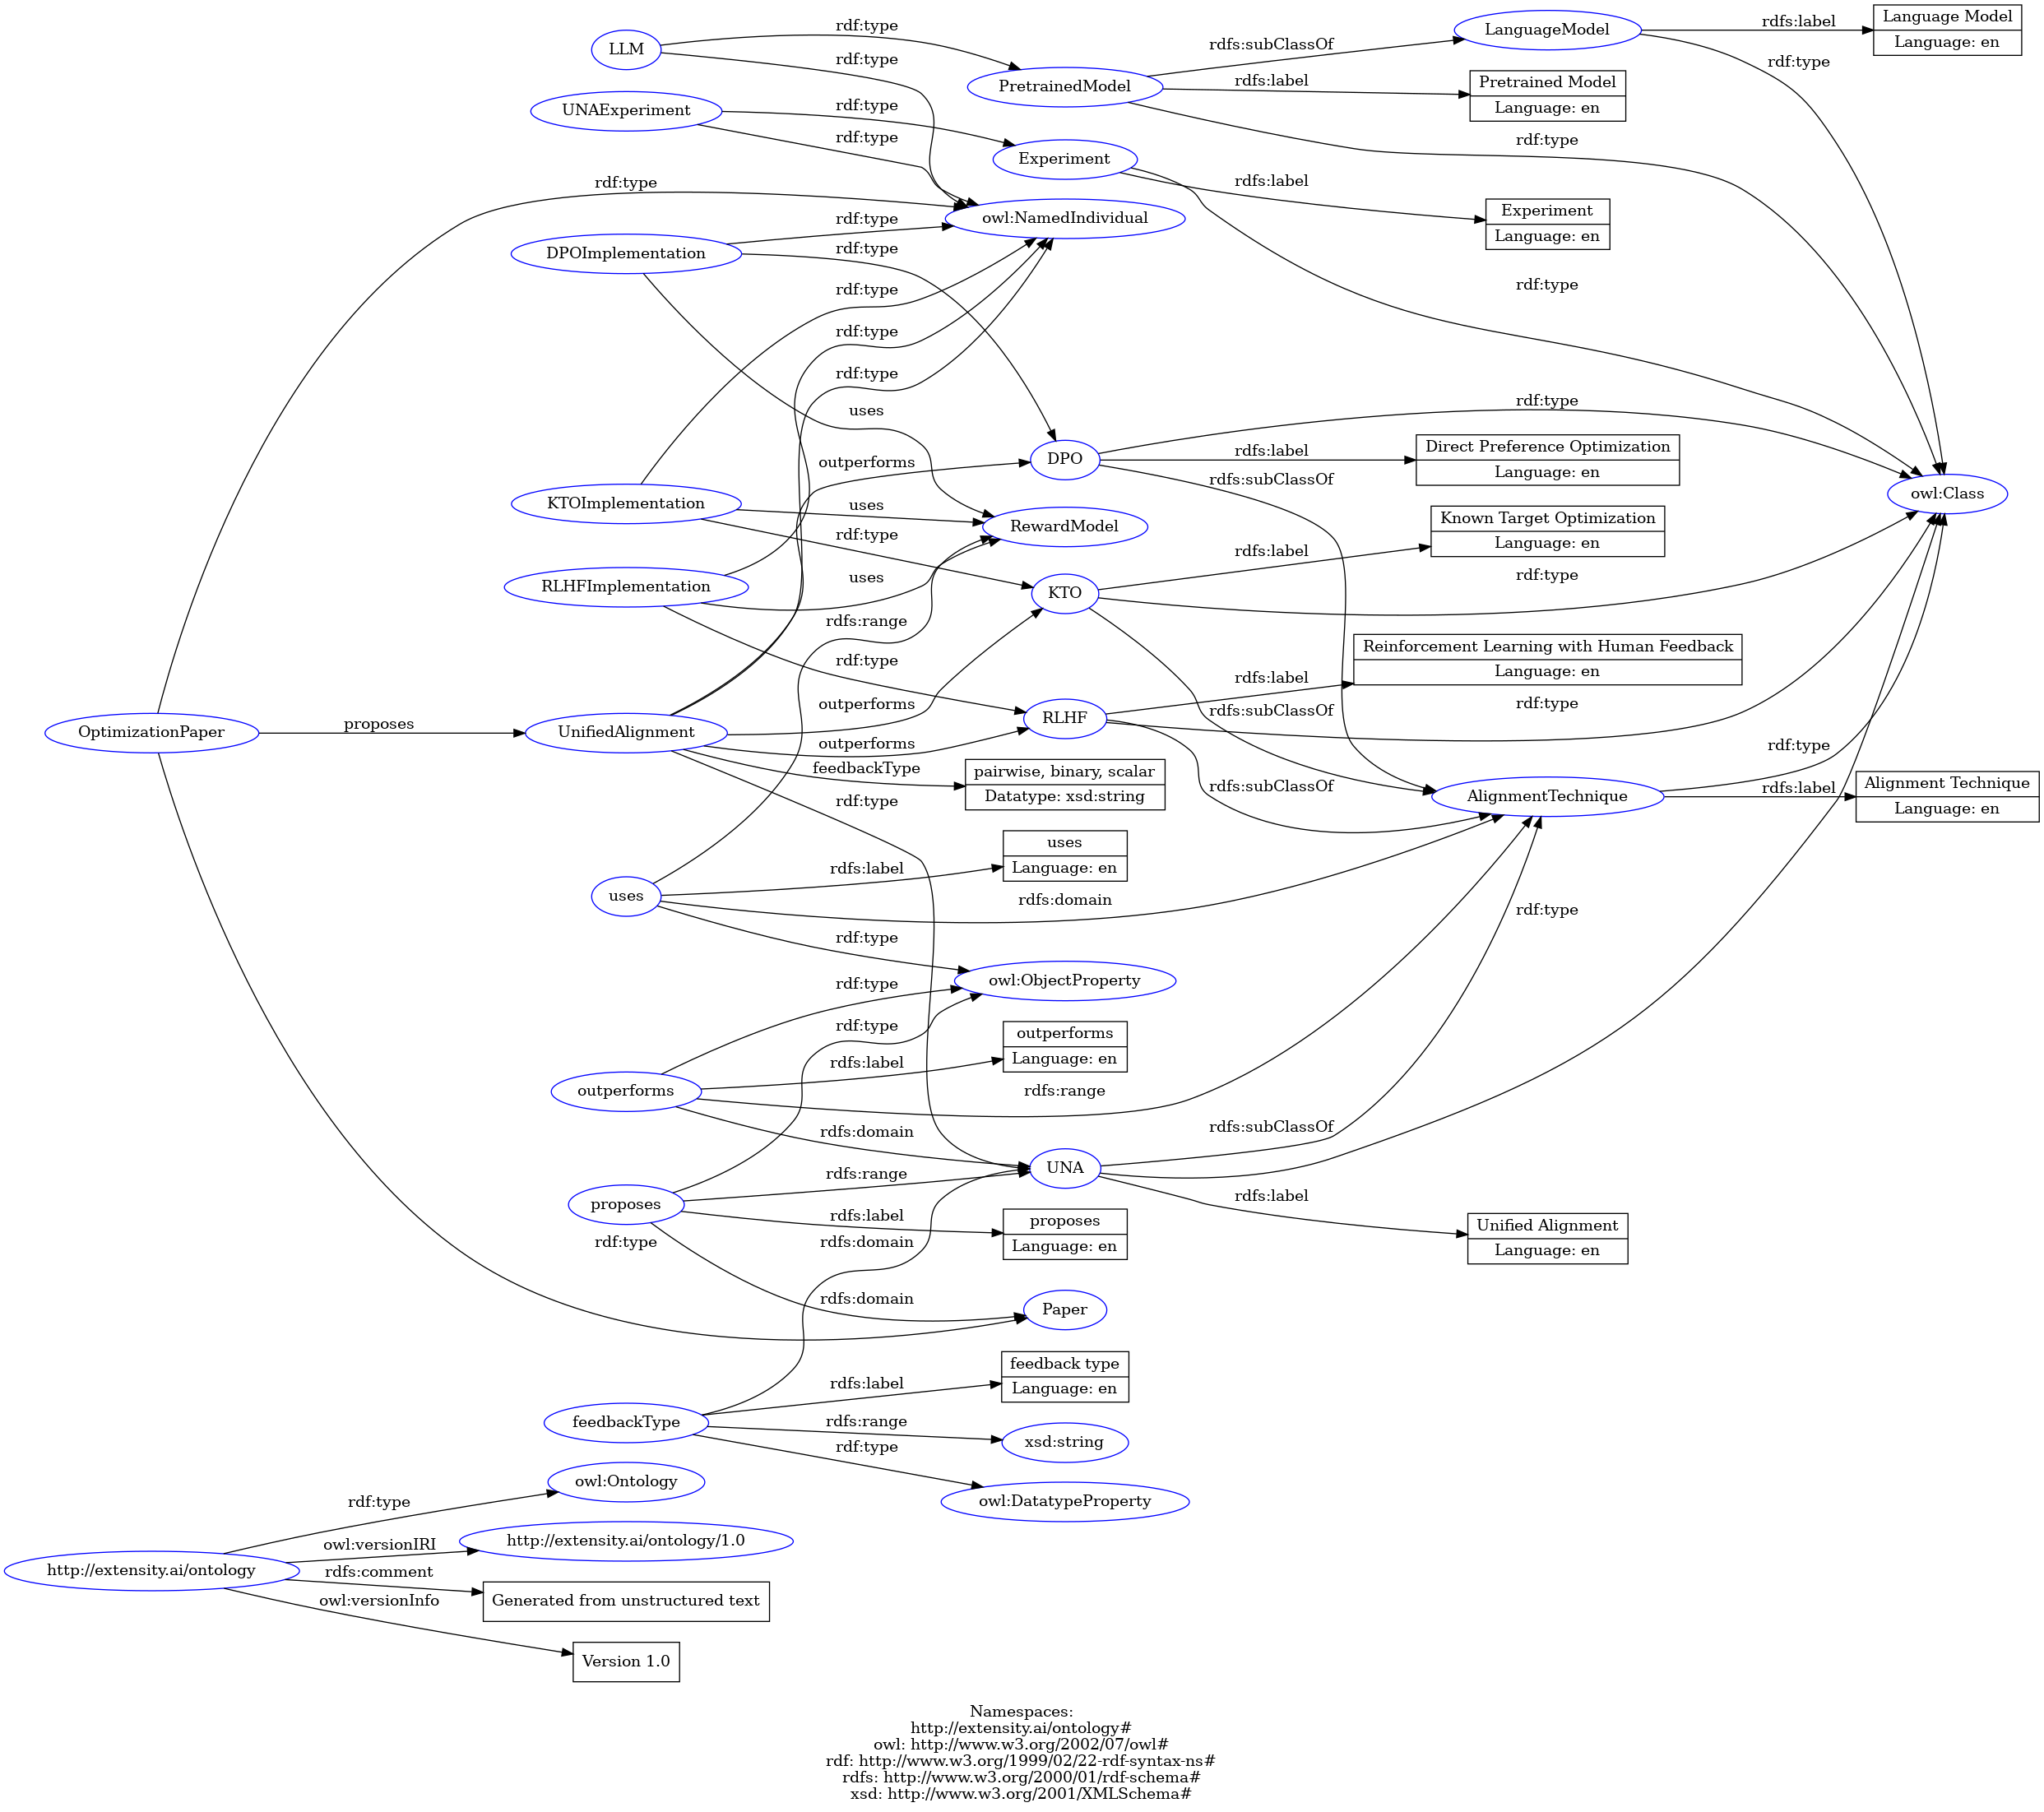

Visualize here: https://www.ldf.fi/service/rdf-grapher 

In [24]:
rdf_xml = rdfxml_res.value[7:-4]

In [25]:
rdf_xml

'<?xml version="1.0"?>\n<rdf:RDF xmlns="https://w3id.org/dlprovenance#"\n         xml:base="https://w3id.org/dlprovenance"\n         xmlns:owl="http://www.w3.org/2002/07/owl#"\n         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\n         xmlns:xsd="http://www.w3.org/2001/XMLSchema#"\n         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#">\n\n    <owl:Ontology rdf:about="">\n        <rdfs:label xml:lang="en">Ontology for LLM Alignment Techniques</rdfs:label>\n        <rdfs:comment>Generated ontology for LLM alignment techniques including UNA, RLHF, DPO, and KTO.</rdfs:comment>\n    </owl:Ontology>\n\n    <!-- Classes -->\n    <owl:Class rdf:about="https://w3id.org/dlprovenance#LLM">\n        <rdfs:label xml:lang="en">LLM</rdfs:label>\n        <rdfs:subClassOf rdf:resource="http://www.w3.org/ns/prov#Entity"/>\n        <rdfs:comment xml:lang="en">Large Language Model which is pretrained on large datasets.</rdfs:comment>\n    </owl:Class>\n    \n    <owl:Class rdf:about=

In [39]:
from rdflib import Graph, Namespace, RDF, RDFS, OWL
from graphviz import Digraph
import xml.etree.ElementTree as ET
import re

def extract_local_name(uri):
    """Extract the local name from a URI."""
    if '#' in uri:
        return uri.split('#')[-1]
    return uri.split('/')[-1]

def is_class(g, uri):
    """Check if the URI represents a class."""
    return (uri, RDF.type, OWL.Class) in g or (uri, RDF.type, RDFS.Class) in g

def is_property(g, uri):
    """Check if the URI represents a property."""
    return (uri, RDF.type, OWL.ObjectProperty) in g or (uri, RDF.type, OWL.DatatypeProperty) in g

def is_individual(g, uri):
    """Check if the URI represents an individual."""
    return (uri, RDF.type, OWL.NamedIndividual) in g

def create_rdf_visualization(rdf_xml, output_file='rdf_graph'):
    """
    Create a visualization of RDF/XML data using Graphviz with improved styling.

    Args:
        rdf_xml (str): RDF/XML content as string
        output_file (str): Name of the output file without extension
    """
    # Parse RDF/XML
    g = Graph()
    g.parse(data=rdf_xml, format='xml')

    # Create Digraph object
    dot = Digraph(comment='RDF Graph Visualization')
    dot.attr(rankdir='LR')

    # Track nodes and edges to avoid duplicates
    nodes = set()
    edges = set()

    # Default node styling
    dot.attr('node', fontname='Arial', fontsize='10')

    # Process each triple in the graph
    for s, p, o in g:
        # Process subject
        s_name = extract_local_name(s)
        if s_name not in nodes:
            # Style based on node type
            if is_class(g, s):
                dot.node(s_name, s_name, shape='box', style='rounded,filled',
                        fillcolor='#E3F2FD', color='#1976D2', penwidth='2')
            elif is_property(g, s):
                dot.node(s_name, s_name, shape='diamond', style='filled',
                        fillcolor='#E8F5E9', color='#2E7D32', penwidth='2')
            elif is_individual(g, s):
                dot.node(s_name, s_name, shape='ellipse', style='filled',
                        fillcolor='#FFF3E0', color='#F57C00', penwidth='2')
            else:
                dot.node(s_name, s_name, shape='box', style='rounded,filled',
                        fillcolor='#F5F5F5', color='#757575', penwidth='1.5')
            nodes.add(s_name)

        # Process predicate
        p_name = extract_local_name(p)

        # Process object
        o_name = extract_local_name(o)
        if o_name not in nodes:
            if isinstance(o, (str, int, float)):
                # Literal values
                dot.node(o_name, f'"{str(o)}"', shape='box', style='rounded,filled',
                        fillcolor='#FAFAFA', color='#616161', penwidth='1.5')
            elif is_class(g, o):
                dot.node(o_name, o_name, shape='box', style='rounded,filled',
                        fillcolor='#E3F2FD', color='#1976D2', penwidth='2')
            elif is_property(g, o):
                dot.node(o_name, o_name, shape='diamond', style='filled',
                        fillcolor='#E8F5E9', color='#2E7D32', penwidth='2')
            elif is_individual(g, o):
                dot.node(o_name, o_name, shape='ellipse', style='filled',
                        fillcolor='#FFF3E0', color='#F57C00', penwidth='2')
            else:
                dot.node(o_name, o_name, shape='box', style='rounded')
            nodes.add(o_name)

        # Add edge with styling
        edge = (s_name, o_name, p_name)
        if edge not in edges:
            if p == RDF.type:
                # rdf:type edges
                dot.edge(s_name, o_name, 'rdf:type', color='#1976D2', fontcolor='#1976D2',
                        fontname='Arial', fontsize='9', arrowhead='empty', penwidth='1.5')
            elif p == RDFS.subClassOf:
                # rdfs:subClassOf edges
                dot.edge(s_name, o_name, 'rdfs:subClassOf', color='#0D47A1', fontcolor='#0D47A1',
                        fontname='Arial', fontsize='9', arrowhead='empty', penwidth='1.5')
            else:
                # Regular properties
                dot.edge(s_name, o_name, p_name, color='#424242', fontcolor='#2E7D32',
                        fontname='Arial', fontsize='9', penwidth='1.2')
            edges.add(edge)

    # Save the visualization
    dot.render(output_file, view=True, format='png')


In [27]:
create_rdf_visualization(rdf_xml)

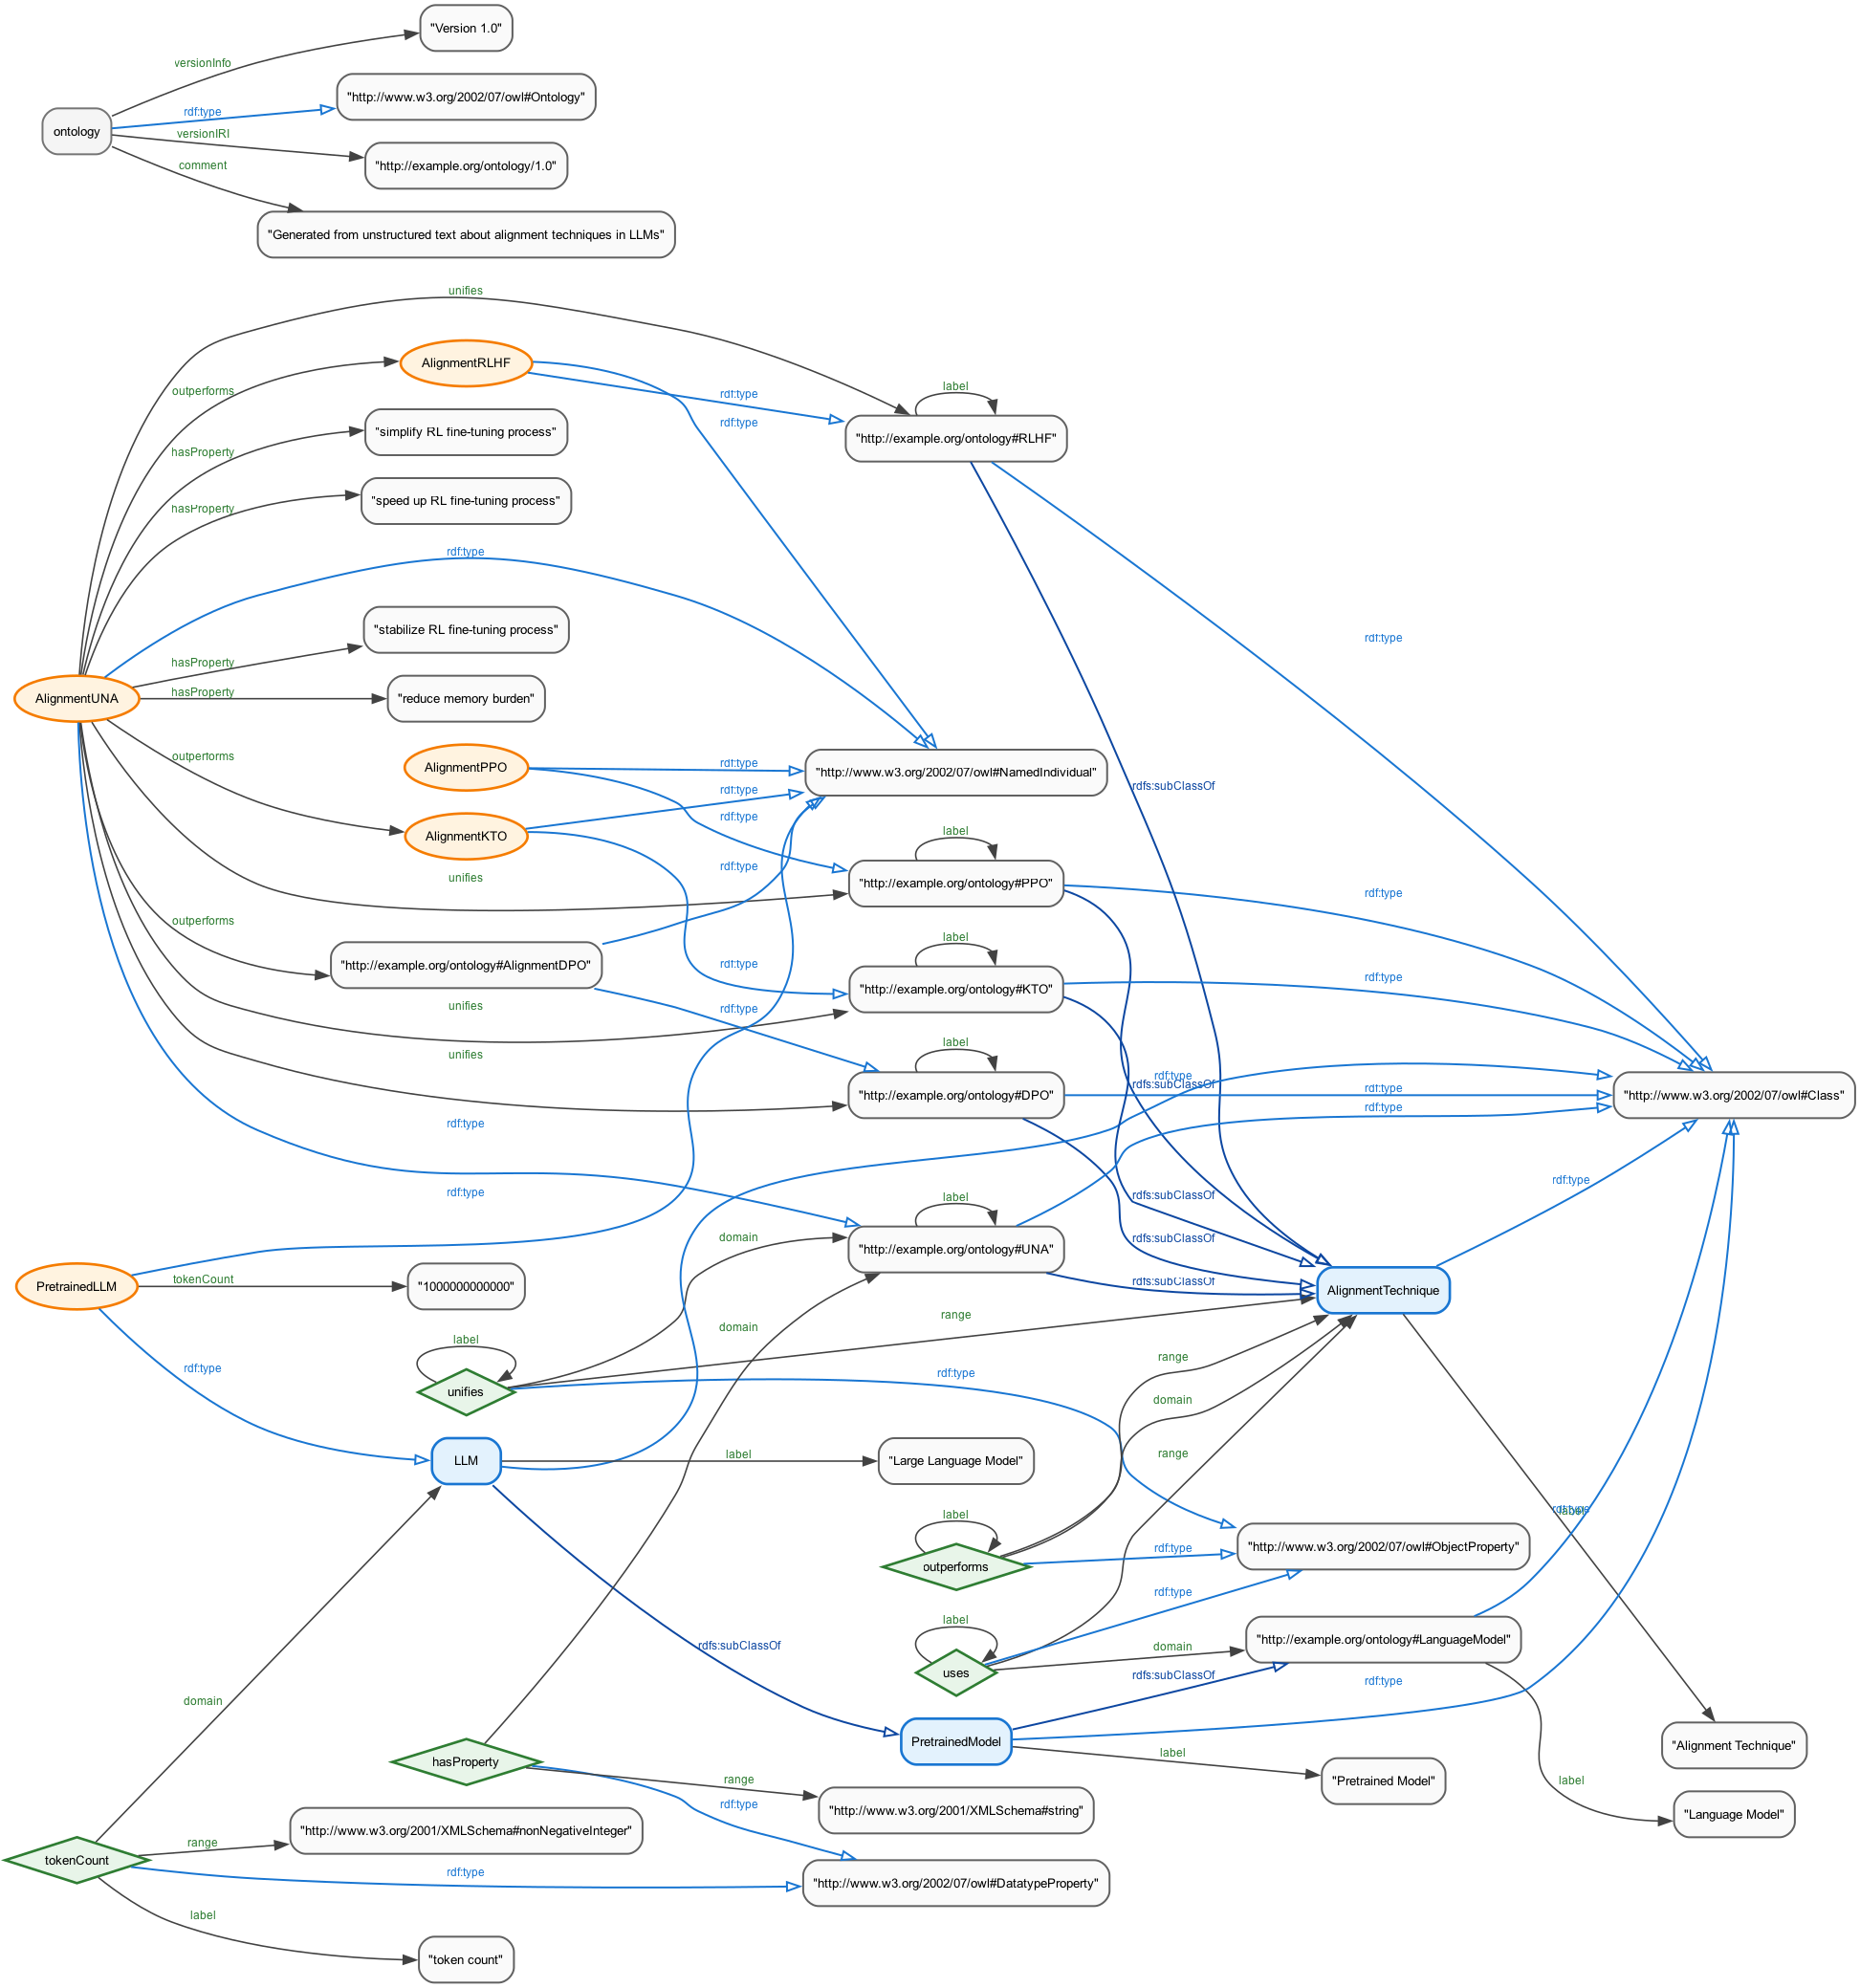

In [51]:
from symai import Expression

class OWL_RDFXML_Expression(Expression):
    def __init__(self):
        super().__init__()
        self.func_rdfxml  = Function(rdfxml_prompt)
        self.func_check   = Function(rdfxml_check_prompt)
        self.func_correct = Function(rdfxml_correct_prompt)

    def forward(self, text: str) -> str:
        rdfxml_base = self.func_rdfxml(text)
        rdfxml_report = self.func_check(rdfxml_base | text)
        rdfxml_res = self.func_correct(rdfxml_base | rdfxml_report | text)
        rdf_xml = rdfxml_res.value[7:-4]
        is_valid, error = validate_owl_xml(rdf_xml)
        if not is_valid:
            raise ValueError(f"Invalid RDF/XML syntax: {error}")
        create_rdf_visualization(rdf_xml)
        return rdf_xml

In [52]:
expr = OWL_RDFXML_Expression()

In [53]:
rdfxml = expr(example)

In [43]:
print(rdfxml)

<?xml version="1.0"?>
<rdf:RDF xmlns="https://w3id.org/dlprovenance/"
         xml:base="https://w3id.org/dlprovenance/"
         xmlns:owl="http://www.w3.org/2002/07/owl#"
         xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:xsd="http://www.w3.org/2001/XMLSchema#">

    <owl:Ontology rdf:about="">
        <rdfs:comment>Ontology for aligning pre-trained LLMs with alignment techniques</rdfs:comment>
        <owl:versionInfo>Version 1.0</owl:versionInfo>
    </owl:Ontology>

    <!-- Classes -->
    <owl:Class rdf:about="#LanguageModel">
        <rdfs:label xml:lang="en">Language Model</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#AlignmentTechnique">
        <rdfs:label xml:lang="en">Alignment Technique</rdfs:label>
    </owl:Class>

    <owl:Class rdf:about="#RLHF">
        <rdfs:label xml:lang="en">Reinforcement Learning from Human Feedback (RLHF)</rdfs:label>
        <rdfs:subClassOf rd